# NATURAL LANGUAGE PROCESSING

## What is NLP?
- Using computers to process (analyze, understand, generate) natural human languages

## PART 1: READING IN THE YELP REVIEWS

- "corpus" = collection of documents
- "corpora" = plural form of corpus

In [2]:
## PRE-REQUISITES (Install the following from the Terminal)
## pip install textblob
## python -m textblob.download_corpora

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [4]:
# read yelp.csv into a DataFrame
yelp = pd.read_csv('./data/yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [7]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [8]:
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [9]:
yelp_best_worst.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [10]:
# split the new DataFrame into training and testing sets
# train_test_split(X, y, random_state=1) # default split is 75/25. X=yelp text y=classification (1 or 5)
X_train, X_test, y_train, y_test = train_test_split(yelp_best_worst.text, yelp_best_worst.stars, random_state=1)

## PART 2: TOKENIZATION
- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [11]:
# use CountVectorizer to create document-term matrices from X_train and X_test
# Convert a collection of text documents to a matrix of token counts. This implementation produces a sparse representation 
# of the counts. If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind 
# of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [12]:
# rows are documents, columns are terms (aka "tokens" or "features")
train_dtm.shape

(3064, 16825)

In [13]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min', u'10mins', u'10minutes', u'10pm', u'10th', u'10x', u'11', u'110', u'1100', u'111', u'111th', u'112', u'115th', u'118', u'11a', u'11am', u'11p', u'11pm', u'12', u'120', u'128i']


In [14]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [15]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

**[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)**
- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [16]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(3064, 20838)

- **token_pattern:** string
- Regular expression denoting what constitutes a "token". The default regexp select tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).

In [17]:
# allow tokens of one character
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(3064, 16861)

In [18]:
print vect.get_feature_names()[-50:]

[u'z', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [21]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(3064, 169847)

In [22]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


###  PREDICTING THE STAR RATING

In [23]:
# use default options for CountVectorizer
vect = CountVectorizer()

In [24]:
# create document-term matrices
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [25]:
print train_dtm.shape
print test_dtm.shape

(3064, 16825)
(1022, 16825)


In [26]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features 
# (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. 

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)

In [27]:
vect.get_feature_names()[-50:]

[u'yyyyy',
 u'z11',
 u'za',
 u'zabba',
 u'zach',
 u'zam',
 u'zanella',
 u'zankou',
 u'zappos',
 u'zatsiki',
 u'zen',
 u'zero',
 u'zest',
 u'zexperience',
 u'zha',
 u'zhou',
 u'zia',
 u'zihuatenejo',
 u'zilch',
 u'zin',
 u'zinburger',
 u'zinburgergeist',
 u'zinc',
 u'zinfandel',
 u'zing',
 u'zip',
 u'zipcar',
 u'zipper',
 u'zippers',
 u'zipps',
 u'ziti',
 u'zoe',
 u'zombi',
 u'zombies',
 u'zone',
 u'zones',
 u'zoning',
 u'zoo',
 u'zoyo',
 u'zucca',
 u'zucchini',
 u'zuchinni',
 u'zumba',
 u'zupa',
 u'zuzu',
 u'zwiebel',
 u'zzed',
 u'\xe9clairs',
 u'\xe9cole',
 u'\xe9m']

In [28]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


In [29]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary.mean()

0.81996086105675148

In [30]:
# define a function that accepts a vectorizer and returns the accuracy
def tokenize_test(vect):
    train_dtm = vect.fit_transform(X_train)
    print 'Features: ', train_dtm.shape[1]
    test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(train_dtm, y_train)
    y_pred_class = nb.predict(test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [31]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  169847
Accuracy:  0.854207436399


In [32]:
vect.get_feature_names()[-50:]

[u'zone out',
 u'zone when',
 u'zones',
 u'zones dolls',
 u'zoning',
 u'zoning issues',
 u'zoo',
 u'zoo and',
 u'zoo is',
 u'zoo not',
 u'zoo the',
 u'zoo ve',
 u'zoyo',
 u'zoyo for',
 u'zucca',
 u'zucca appetizer',
 u'zucchini',
 u'zucchini and',
 u'zucchini bread',
 u'zucchini broccoli',
 u'zucchini carrots',
 u'zucchini fries',
 u'zucchini pieces',
 u'zucchini strips',
 u'zucchini veal',
 u'zucchini very',
 u'zucchini with',
 u'zuchinni',
 u'zuchinni again',
 u'zuchinni the',
 u'zumba',
 u'zumba class',
 u'zumba or',
 u'zumba yogalates',
 u'zupa',
 u'zupa flavors',
 u'zuzu',
 u'zuzu in',
 u'zuzu is',
 u'zuzu the',
 u'zwiebel',
 u'zwiebel kr\xe4uter',
 u'zzed',
 u'zzed in',
 u'\xe9clairs',
 u'\xe9clairs napoleons',
 u'\xe9cole',
 u'\xe9cole len\xf4tre',
 u'\xe9m',
 u'\xe9m all']

## PART 3: STOPWORD REMOVAL
- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [33]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [34]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  16528
Accuracy:  0.915851272016


In [35]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

## PART 4: OTHER COUNTVECTORIZER OPTIONS 
- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [36]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.869863013699


In [37]:
# all 100 features
print vect.get_feature_names()

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'clean', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', 

In [38]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.885518590998


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [42]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  43957
Accuracy:  0.932485322896


## Part 5: INTRODUCTION TO TextBlob
* TextBlob: "Simplified Text Processing"

In [43]:
# print the first review
print yelp_best_worst.text[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [44]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [45]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [46]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [47]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

## PART 6: STEMMING AND LEMMATIZATION

**STEMMING:**
- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [48]:
# initialize stemmer
stemmer = SnowballStemmer('english')

In [49]:
# stem each word
print [stemmer.stem(word) for word in review.words]

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

**LEMMATIZATION**
- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [50]:
# assume every word is a noun
print [word.lemmatize() for word in review.words]

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'wa', 'excellent', 'The', 'weather', u'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', u'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', u'egg', 'vegetabl

In [51]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

In [52]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [53]:
# use split_into_lemmas as the feature extraction function
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  16452
Accuracy:  0.920743639922


In [54]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yuyuyummy', u'yuzu', u'z', u'z-grill', u'z11', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zen-like', u'zero', u'zero-star', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zipps', u'ziti', u'zoe', u'zombi', u'zombie', u'zone', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel-kr\xe4uter', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


## PART 7: TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY 
- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [55]:
# example documents
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']

In [56]:
# CountVectorizer
vect = CountVectorizer()
pd.DataFrame(vect.fit_transform(train_simple).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [57]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(train_simple).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## PART 8: USING TF-IDF TO SUMMARIZE A YELP REVIEW

In [58]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28881)

In [59]:
len(features)

28881

In [60]:
len(yelp)

10000

In [61]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.text[review_id], 'utf-8')
        #review_text = yelp.text[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [62]:
summarize()

TOP SCORING WORDS:
continental
sandwich
ciabatta
gorgonzola
trader

RANDOM WORDS:
potato
food
hands
favorites
beef

Simple, well prepared food. Not the cheapest sandwich shop, but it is consistently high quality. The best part is the bread. It's all good, but I especially like the ciabatta. And being next to changing hands and trader joe's doesn't hurt!

Some favorites:

Chicken continental, sweet potato sandwich for something different, roast beef and gorgonzola.


## PART 9: SENTIMENT ANALYSIS

In [63]:
print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [64]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [65]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)

In [66]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [67]:
# create a new DataFrame column for sentiment
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

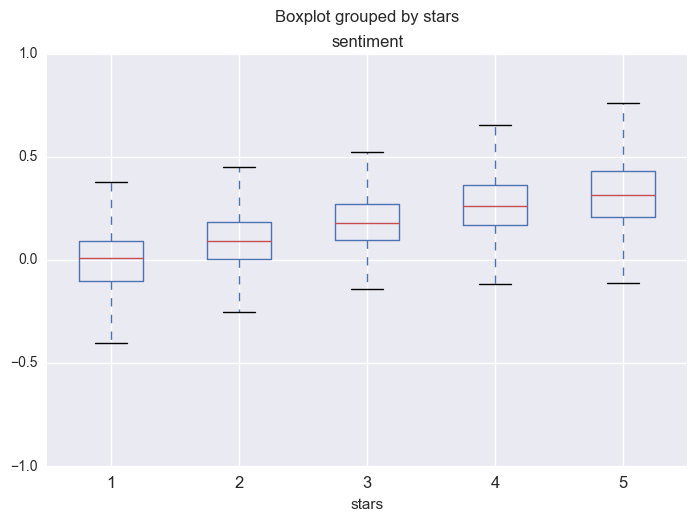

In [68]:
%matplotlib inline
import seaborn as sns

# boxplot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [69]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [70]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [71]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [72]:
# negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083
1287,57-dgZzOnLox6eudArRKgw,2008-08-28,sksXE8krD3WvqSOhtlSUyQ,5,"Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.",review,gEnU4BqTK-4abqYl_Ljjfg,3,3,5,134,-0.625000
3075,PwtYeGu-19v9bU4nbP9UbA,2011-12-05,8yfOlQGxQlCgQL9TnnzQkw,5,Unfortunately Out of Business.,review,0fOPM1H03gF5EJooYvkL1Q,0,2,0,30,-0.500000
3516,Bc4DoKgrKCtCuN-0O5He3A,2009-12-19,-qqrl4101KbQKIdar1lMRw,5,"Cashew brittle, almond brittle, bacon brittle! Go now, before it's too late!",review,wHg1YkCzdZq9WBJOTRgxHQ,9,8,6,77,-0.375000
6726,FURgKkRFtMK5yKbjYZVVwA,2012-08-13,8xx8i94sKvBhWZv8ZVyfBA,5,"Brown bag chicken sammich, mac n cheese, fried okra, and the bourbon drink. Nuff said.",review,hFP7Si9jvdOUmmMesg4ghw,0,0,0,87,-0.600000


In [73]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667
2353,3Srfy_VeCgwDbo4iyUFOtw,2006-08-23,K8tXedC2NMBEZ8p77zg23Q,1,"My co-workers and I refer to this place as ""Pizza n' Ants"". The staff will be happy to serve you with bare hands, right after using the till. Also, as the nickname suggests, there has been a noticable insect problem. \r\n\r\n\r\n\r\nAs if that could all be overlooked, the pizza isn't even good. If you are in this part of town, go to Z Pizza or Slices for great pizza instead!",review,rPGZttaVjRoVi3GYbs62cg,0,1,0,372,0.567143
5257,cXx-fHY11Se8rFHkkUeaUg,2009-10-27,2yHyr0N_XNZggmIfZ7JaHw,1,"Remember how I said that the Trivia was the best thing about this place? Well, they got rid of long time Triva host, Dave (who had been featured in the College Times and was the best thing about the trivia). Without Dave's personality, this place just doesn't cut it. Will never go here again. Bummer.",review,nx2PS25Qe3MCEFUdO_XOtw,2,4,0,304,0.650000
6222,fDZzCjlxaA4OOmnFO-i0vw,2012-07-09,F5aRE4oqmHthiHudmnShLQ,1,"My mother always told me, if I didn't have anything nice to say, say nothing!",review,J92bzxYVmyoLHULzh9xNCA,1,2,1,77,0.750000
6702,77oW-QeIXbUoTbUbrdD2aA,2012-01-05,oVYk9Gxa3TY63FAeoeCEzg,1,Most livable city my eye!\r\nPlastic yuppies around every corner looking for a reason to belong. I can't wait for the homosexuals to take control of this dog park and give it some class.\r\n\r\nAvoid at all cost.,review,ek4GWXatDshMorJwGC2JAw,1,2,4,207,0.625000


In [74]:
# reset the column display width
pd.reset_option('max_colwidth')

## PART 10: ADDING FEATURES TO A DOCUMENT-TERM MATRIX

In [75]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# split the new DataFrame into training and testing sets
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
X_train.shape

(3064, 5)

In [77]:
# use CountVectorizer with text column only
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train.iloc[:, 0])
test_dtm = vect.transform(X_test.iloc[:, 0])
print train_dtm.shape

(3064, 16825)


In [78]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.iloc[:, 1:].astype(float))
extra.shape

(3064, 4)

In [79]:
extra

<3064x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6755 stored elements in Compressed Sparse Row format>

In [80]:
# combine sparse matrices
train_dtm_extra = sp.sparse.hstack((train_dtm, extra))
train_dtm_extra.shape

(3064, 16829)

In [81]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.iloc[:, 1:].astype(float))
test_dtm_extra = sp.sparse.hstack((test_dtm, extra))
test_dtm_extra.shape

(1022, 16829)

In [82]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)

0.917808219178


In [83]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm_extra, y_train)
y_pred_class = logreg.predict(test_dtm_extra)
print metrics.accuracy_score(y_test, y_pred_class)

0.922700587084


## PART 11: FUN TEXTBLOB FEATURES

In [84]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [85]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [86]:
# definitions
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']